# Gráfico de Regresión
Es un Scatter Plot con una línea de tendencia (Line of Best Fit). Esta línea representa matemáticamente una regresión lineal con la forma *y = mx + b*. En otras palabras, es una recta con la que yo puedo "predecir" que valor de "y" tendria un nuevo valor de "x". Para este gráfico, ambas variables deben ser numéricas.

**Eje X**: Variable numérica  
**Eje Y**: Variable numérica  

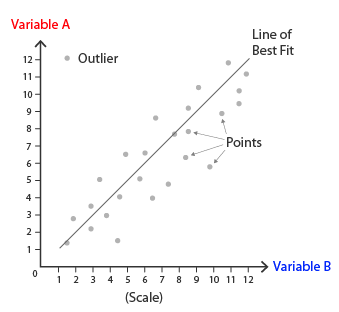

**Ejemplos de Uso**:

- Como un doctor, me gustaría saber si el nivel de colesterol de una persona se correlaciona con su peso

### Cuando utilizar
- Quiero comprobar si existe algun tipo de correlación entre dos variables. 
- Quiero observar la distribución de dos variables al mismo tiempo.

### Consejos
- No es necesario que el eje Y empiece en el valor del "cero"
- No utilices colores innecesariamente. Se pueden pintar los puntos para introducir una (3ra) variable categórica al gráfico. 
- Puedo introducir una 3ra o 4ta variable al gráfico con las siguientes técticas:
  - Diferentes formas en los "puntos" para introducir una variable categórica.
  - Convertirlo en un gráfico de burbujas para introducir una variable numérica.
  - Jugar con la intensidad del color de cada punto para introducir una variable numérica.
- Si tengo muy pocos puntos en mi dataset, el resultado del gráfico no será interpretable
- Si hay una cantidad grande de puntos en mi dataset, podemos coger una muestra, o jugar con la opacidad de los puntos


## En esta clase
### Datos
Información sobre especies de pinguinos
### Objetivos
1. Encontrar alguna correlación entre las características de los pinguinos


## Tipos de correlación entre variables

<img src='https://i.ytimg.com/vi/9bKlDrVxcsM/hq720.jpg?sqp=-oaymwE7CK4FEIIDSFryq4qpAy0IARUAAAAAGAElAADIQj0AgKJD8AEB-AH-CYAC0AWKAgwIABABGHIgQyhDMA8=&rs=AOn4CLAS_Lfo3eeEqCNsryus__ZBQ_9W_g' />

## Referencias
- https://datavizcatalogue.com/ES/metodos/diagrama_de_dispersion.html
- https://chartio.com/learn/charts/what-is-a-scatter-plot/

In [1]:
%pip install scipy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   -- ------------------------------------- 2.1/38.5 MB 11.3 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/38.5 MB 11.5 MB/s eta 0:00:03
   ------- -------------------------------- 7.1/38.5 MB 11.6 MB/s eta 0:00:03
   --------- ------------------------------ 9.4/38.5 MB 11.7 MB/s eta 0:00:03
   ------------ --------------------------- 11.8/38.5 MB 11.6 MB/s eta 0:00:03
   -------------- ------------------------- 14.2/38.5 MB 11.7 MB/s eta 0:00:03
   ----------------- ---------------------- 16.5/38.5 MB 11.7 MB/s eta 0:00:02
   ------------------- -------------------- 19.1/38.5 MB 11.7 MB/s eta 0:00:02
   ---------------------- ----------------- 21.5/38.5 MB 11.7 MB/s eta 0:00:02
   ------------------------ --------------- 23.9/38.5 MB 11.7 MB/s eta 0:00:02
   --------------------------- ------------ 26.2/38.5 MB 11.7 MB/s

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp # permite hacer calculos estadisticos
sns.set_style("whitegrid") # son searborn es más facil graficar una regresión

In [3]:
# Leemos los datos con Pandas
df = pd.read_csv('../data/pinguinos.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
# Eliminamos filas NaNs
df = df.dropna()
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
# r, es el coeficiente de correlación lineal
# p, valida que el valor de r tenga significancia estadistica, debe ser menor que 0.05
r, p = sp.stats.pearsonr(df['flipper_length_mm'], df['culmen_length_mm'])
r, p

(np.float64(0.6521257442177316), np.float64(7.874576982844369e-42))

Text(0.5, 1.0, 'Longitud de las Aletas vs Longitud del Pico en Pinguinos')

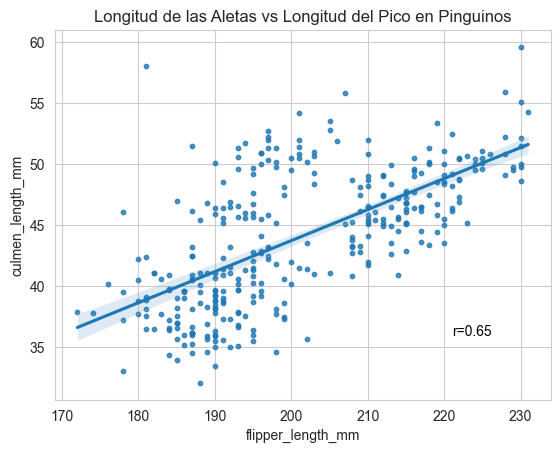

In [ ]:
# Flipper lenght vs Culmen Lenght 
# https://seaborn.pydata.org/generated/seaborn.regplot.html
sns.regplot(
    data=df,
    x='flipper_length_mm', # aletas
    y='culmen_length_mm', # picos
    scatter_kws={ 
        's': 10 # reduciomos el tamaño de los puntos
    }
)
# escribe un texto dentro del grafico, recibe el punto X, Y, el contenido y el color del texto
plt.text(221, 36, 'r='+str(r)[0:4],  color='black')

# titulo del grafico
plt.title('Longitud de las Aletas vs Longitud del Pico en Pinguinos')

# la sombra azul es un intervalo de confianza para la predición de los siguientes puntos.